In [132]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as pt
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [407]:
sector_dict={'1':'Agriculture, forestry and fishing',
             '1.1':'Crops','1.2':'Livestock','1.3':'Forestry and logging','1.4':'Fishing and aquaculture',
             '2':'Mining and quarrying','3':'Manufacturing','4':'Electricity, gas, water supply & other utility services',
             '5':'Construction','6':'Trade, repair, hotels and restaurants',
             '6.1':'Trade & repair services','6.2':'Hotels & restaurants',
             '7':'Transport, storage, communication & services related to broadcasting',
             '7.1':'Railways','7.2':'Road transport','7.3':'Water transport','7.4':'Air transport',
             '7.5':'Services incidental to transport','7.6':'Storage','7.7':'Communication & services related to broadcasting',
             '8':'Financial services','9':'Real estate, ownership of dwelling & professional services',
             '10':'Public administration','11':'Other services','12':'TOTAL GSVA at basic prices','13':'Taxes on Products',
             '14':'Subsidies on products','15':'Gross State Domestic Product','16':"Population ('00)",
             '17':'Per Capita GSDP (Rs.)'}
path= r'C:\Users\ltadmin\Downloads\GDP_Assignment\Input_Files'

##### Read input file

In [408]:
df=pd.read_csv(path+"/GSDP-consolidated.csv",encoding='ANSI')

##### Drop all empty rows and columns

In [410]:

#drop all empty columns
col_dict=dict((df.isna().mean()==1))
for col in col_dict.keys():
    if(col_dict[col]==True):
        df=df.drop(col,axis=1)

#drop all empty rows
index_dict=dict((df.isna().mean(axis=1)==1))
for idx in index_dict.keys():
    if(index_dict[idx]==True):
        df=df.drop(idx)
        


In [411]:
df.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,72720.0,78254.0,150918.0,603778.0,364048.0,315561.0,1272967.0,12915.0,19918.0,7259.0,11839.0,227872.0,266628.0,436465.0,11165.0,751485.0,359433.0,19208.0,724049.0,115523.0,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,82820.0,87105.0,174724.0,691700.0,412313.0,380924.0,1448466.0,13748.0,21872.0,8362.0,13619.0,258275.0,297734.0,494004.0,12338.0,855481.0,401493.0,21663.0,822903.0,131835.0,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,94764.0,95893.0,188567.0,817886.0,465041.0,437737.0,1647506.0,16198.0,22938.0,10293.0,16612.0,291709.0,334714.0,549701.0,13862.0,971090.0,452186.0,25593.0,944146.0,149817.0,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,104369.0,100404.0,217107.0,921788.0,526002.0,481982.0,1792122.0,18043.0,24408.0,11559.0,18414.0,321971.0,368011.0,612194.0,15209.0,1092564.0,511178.0,29667.0,1043371.0,161985.0,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,118387.0,241955.0,1027068.0,588337.0,543975.0,NaN,NaN,26745.0,NaN,NaN,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,30304.0,551963.0,26533.0,13675331.0


##### Drop columns for Union Territories

In [412]:
union_territories=['Chandigarh','Delhi','Andaman & Nicobar Islands','Puducherry']
#Drop columns for union territories
df=df.drop(union_territories,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 31 columns):
Items  Description    11 non-null object
Duration              11 non-null object
Andhra Pradesh        11 non-null float64
Arunachal Pradesh     9 non-null float64
Assam                 9 non-null float64
Bihar                 9 non-null float64
Chhattisgarh          11 non-null float64
Goa                   9 non-null float64
Gujarat               9 non-null float64
Haryana               11 non-null float64
Himachal Pradesh      7 non-null float64
Jammu & Kashmir       9 non-null float64
Jharkhand             9 non-null float64
Karnataka             9 non-null float64
Kerala                9 non-null float64
Madhya Pradesh        11 non-null float64
Maharashtra           7 non-null float64
Manipur               7 non-null float64
Meghalaya             11 non-null float64
Mizoram               7 non-null float64
Nagaland              7 non-null float64
Odisha                11 non-nu

# Percent growth over previous rows

##### Extract  %growth over previous year rows alone

In [413]:

#Extracting rows only for % growth over previous year
df1=df[df['Items  Description']=='(% Growth over previous year)']
df1.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,11.31,15.77,14.56,13.26,20.71,13.79,6.45,9.81,15.2,15.03,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,7.92,18.24,12.79,14.91,13.74,17.83,4.87,23.1,21.98,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,15.14,12.70,13.11,10.11,8.78,11.39,6.41,12.3,10.85,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,11.44,11.42,11.85,12.86,NaN,NaN,9.58,NaN,NaN,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
10,(% Growth over previous year),2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,NaN,NaN,NaN,NaN,17.74,NaN,NaN,10.55,NaN,NaN,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


##### Plot of  percent growth of GDP over previous years with best fit line defining the trend

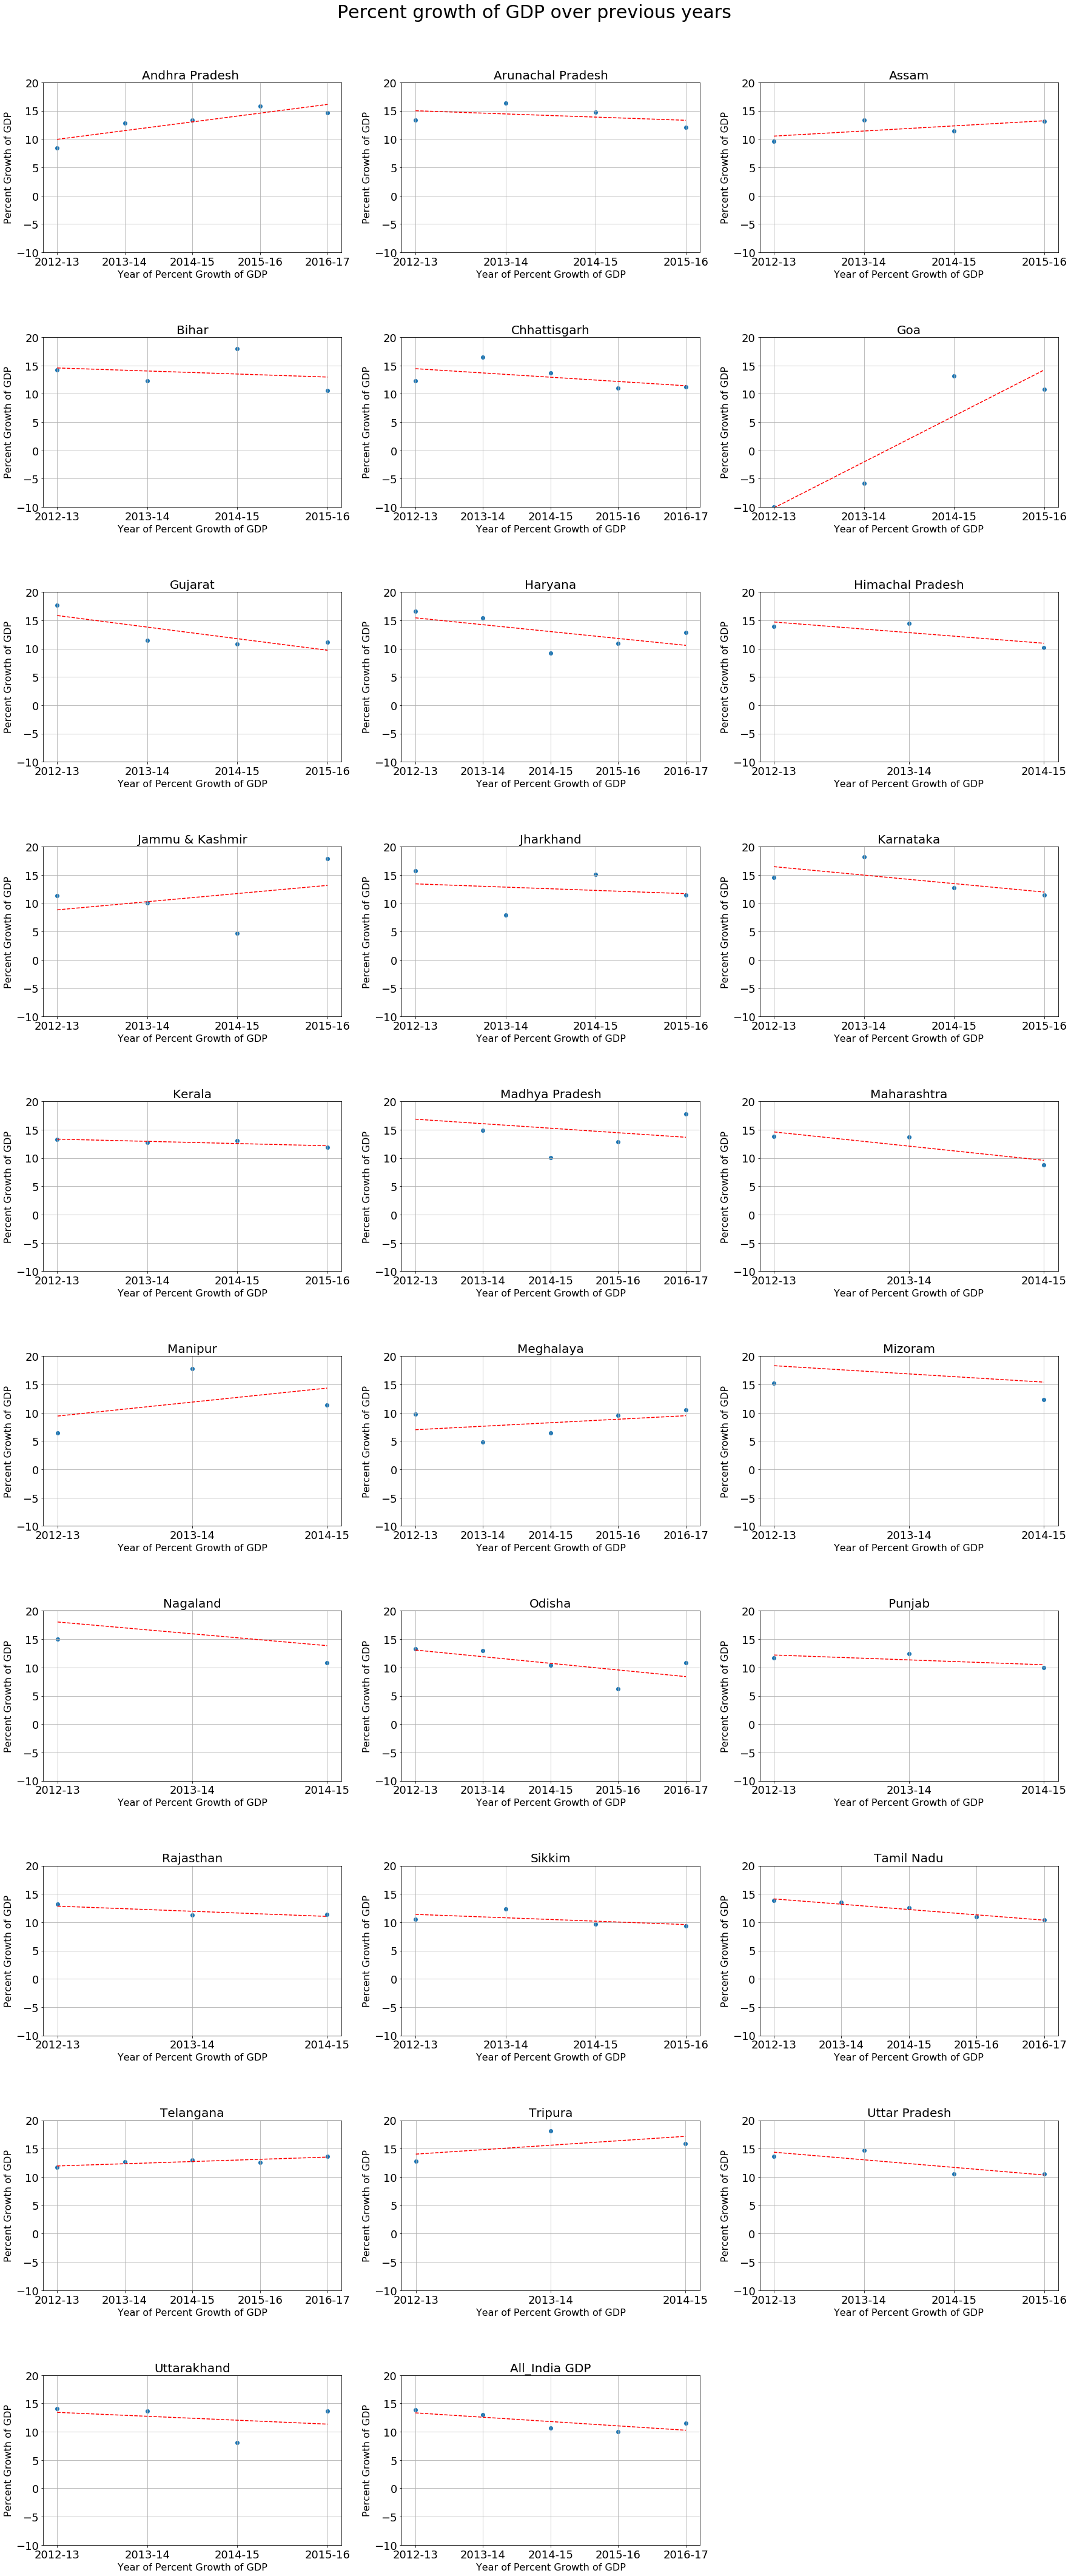

In [414]:
#Subplot has n rows and o columns
n=10
o=3
#figsize set size of the figure
fig,axes=pt.subplots(n,o,figsize=(30,60))
i=0
j=0
#Plot subplots
fig.suptitle('Percent growth of GDP over previous years',fontsize=30)
for col in df1.columns:
    if(col!='Items  Description' and col!='Duration'):
        #Axes for subplot
        ax=axes[i][j]
        df2=df1[df1[col].notnull()]
        
        #k is internal representation of x for finding best fit line
        k=pd.DataFrame(index=[l for l in range(df2[col].count())],columns=['x'])
        k['x']=[l for l in range(df2[col].count())]
        #drop NaN values if any from k
        k=k.dropna()
       
        #Plot scatter for y=State
        ax.scatter(x='Duration',y=col,data=df2)
        
        #Finding m and c for best fit line
        m,c=np.polyfit(k['x'],df2[col],1)
        
        #Plot best fit line
        ax.plot(df2['Duration'],m*k['x']+c,'--r')
        
        #Set title of subplot
        ax.set_title(col,size=20)
        
        #Change fontsize to legible size for xticks and yticks
        ax.tick_params(axis="both",labelsize=18)
        #ax.tick_params(axis="y",labelsize=18)
        
        #Set yaxis scale same for all subplots- Easy for comparison
        ax.set_ylim(bottom=-10,top=20)
        ax.set_ylabel('Percent Growth of GDP',fontsize=16)
        ax.set_xlabel('Year of Percent Growth of GDP',fontsize=16)
        
        #ax.set_yticks(-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20)
        if(j<o-1):
            j=j+1
        else:
            j=0
            i=i+1
        ax.grid()

# Remove unused plots from view
while(j<o):
    fig.delaxes(axes[i][j])
    j=j+1
#Adjust space between plot rows
pt.subplots_adjust(top=0.95,bottom=0.01,hspace=0.5,wspace=0.2)
#pt.savefig('D:/test.png',bbox_inches='tight')


In [415]:
##Calculate Nation's growth rate
col='All_India GDP'
df2=df1[df1[col].notnull()]
        
#k is internal representation of x for finding best fit line
k=pd.DataFrame(index=[l for l in range(df2[col].count())],columns=['x'])
k['x']=[l for l in range(df2[col].count())]
#drop NaN values if any from k
k=k.dropna()

#Finding m and c for best fit line
m,c=np.polyfit(k['x'],df2[col],1)
print("Slope for Nation's best fit line is {}".format(m))

Slope for Nation's best fit line is -0.7660000000000005


In [416]:
##Calculate Home state - Karnataka's line slope
col='Karnataka'
df2=df1[df1[col].notnull()]
        
#k is internal representation of x for finding best fit line
k=pd.DataFrame(index=[l for l in range(df2[col].count())],columns=['x'])
k['x']=[l for l in range(df2[col].count())]
#drop NaN values if any from k
k=k.dropna()

#Finding m and c for best fit line
m,c=np.polyfit(k['x'],df2[col],1)
print('Slope for Karnataka best fit line is {}'.format(m))

Slope for Karnataka best fit line is -1.496000000000004


# GDP for 2015-16

In [417]:
df2=df[df['Items  Description']=='GSDP - CURRENT PRICES (` in Crore)'].query('Duration=="2015-16"')

In [418]:

#Drop invalid rows
df2=df2.dropna(axis=1)


###### Plot  of GSDP of various states using logarythmic scale

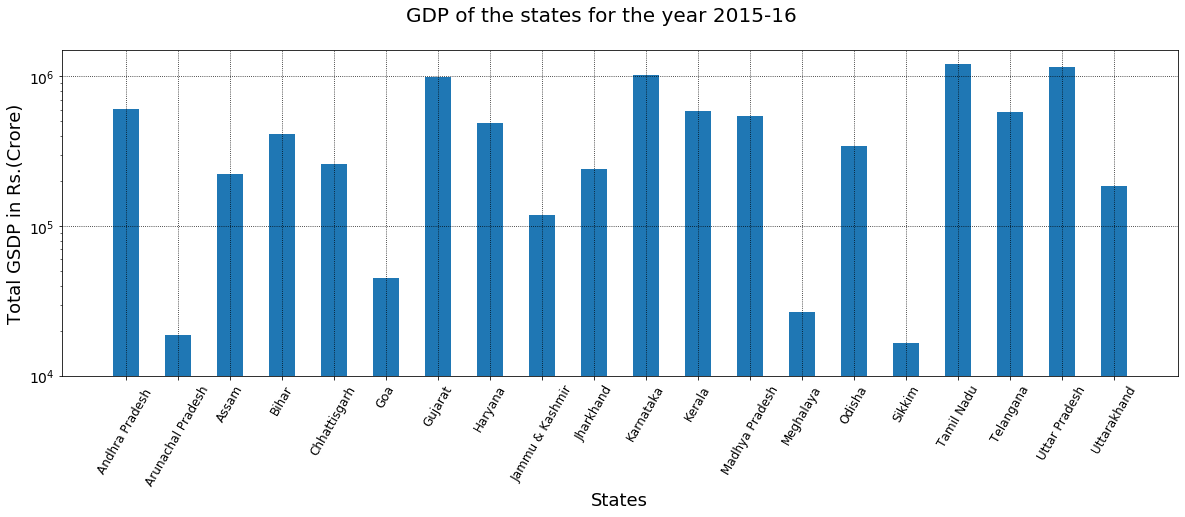

In [419]:
# Plot graph using logarythmic scale
pt.figure(figsize=(20,6))
columns=df2.columns[2:-1]
y_pos=np.arange(len(columns))
pt.bar(y_pos,list(df2.iloc[0][2:-1]),width=0.5,align='center')
pt.xticks(y_pos,columns,rotation=60,fontsize=12)
pt.yscale("log")
pt.yticks([10000,100000,1000000],fontsize=14)
pt.suptitle("GDP of the states for the year 2015-16",fontsize=20)
pt.xlabel("States",fontsize=18)
pt.ylabel("Total GSDP in Rs.(Crore)",fontsize=18)
#pt.grid(which='minor',linestyle=":",color='black')
pt.grid(which='major',linestyle=":",color='black')
#pt.savefig('D:/test.png',bbox_inches='tight')


###### Read all csv files including Union Territory into temp_list and then to dataframe df

In [420]:

all_files=glob.glob(path+'/NAD-*.csv')
temp_list=[]

for location in all_files:
    df=pd.read_csv(location,index_col=None,header=0,encoding='ANSI')
    df=df[['S.No.','Item','2014-15']]
    for i in range(0,len(df)):
       #Rename Item as S.No + Item where S.No. ='Total'
        value=df['S.No.'].iloc[i].strip()
        if(value=='Total'):
            df['Item'].iloc[i]=df['S.No.'].iloc[i]+" "+df['Item'].iloc[i]
        #Remove * and ** at the end of the text from Item column to have Item name same for all states
        value_item=df['Item'].iloc[i].strip()
        while(value_item.endswith('*')==True):
            df['Item'].iloc[i]=value_item[:-1]
            value_item=value_item[:-1]
    #Drop S.No column        
    df=df.drop(columns=['S.No.'])
    df=df.set_index('Item')
    df=df.T
    df.loc[:,'State']=location.split('\\')[-1].split('-')[1].replace('_',' ')
    #Append df to temp_list
    temp_list.append(df)
    
#Convert temp_list to DataFrame
df=pd.concat(temp_list,axis=0,ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 34 columns):
Agriculture, forestry and fishing                                       30 non-null float64
Crops                                                                   30 non-null float64
Livestock                                                               30 non-null float64
Forestry and logging                                                    30 non-null float64
Fishing and aquaculture                                                 30 non-null float64
Mining and quarrying                                                    29 non-null float64
Total Primary                                                           30 non-null float64
Manufacturing                                                           30 non-null float64
Electricity, gas, water supply & other utility services                 30 non-null float64
Construction                                                         

###### Drop Union Territory Data

In [421]:
#Drop union territory data
union_territory=['Chandigarh','Delhi','Puducherry']
for u in union_territory:
        i=df[df['State']==u].index
        df=df.drop(i)

        

##### Plot for Statewise per capita GSDP for 2014-15

In [433]:
df.mean()['Per Capita GSDP (Rs.)']

115352.85185185185

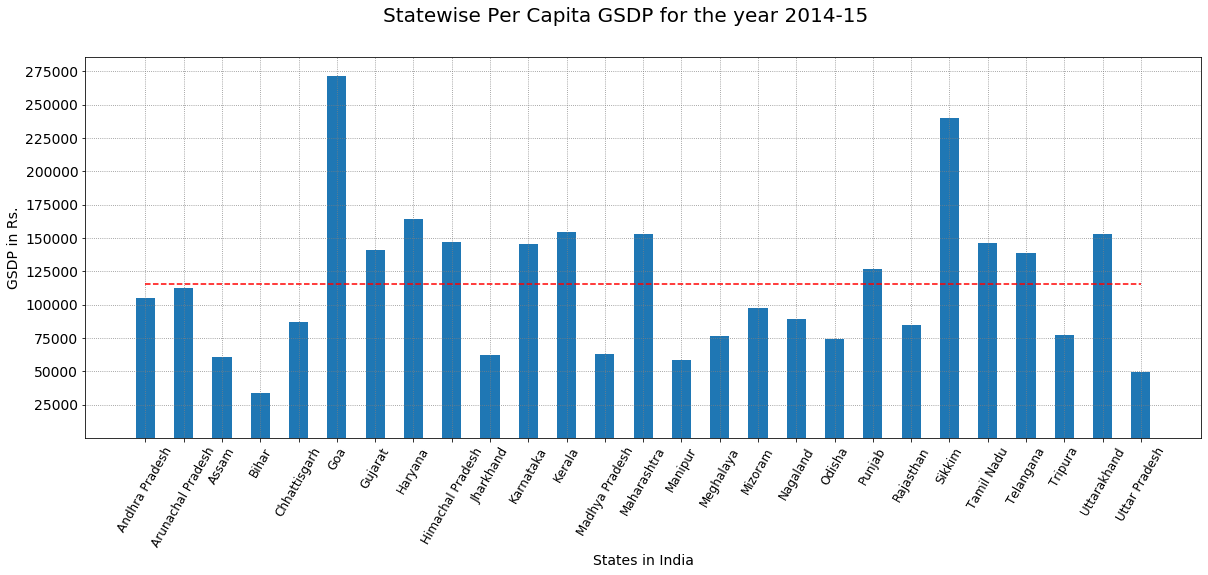

In [465]:
#df8=df[['State','Per Capita GSDP (Rs.)']]
fig=pt.figure(figsize=(20,7))
columns=list(df['State'])
y_pos=np.arange(len(columns))
pt.bar(y_pos,list(df['Per Capita GSDP (Rs.)']),width=0.5,align='center')
pt.xticks(y_pos,columns,rotation=60,fontsize=12)
pt.yticks([i for i in range(25000,300000,25000)],fontsize=14)
pt.suptitle("Statewise Per Capita GSDP for the year 2014-15",fontsize=20)
pt.ylabel("GSDP in Rs.",fontsize=14)
pt.xlabel("States in India",fontsize=14)
#ax2=ax1.twinx()
pt.plot([df.mean()['Per Capita GSDP (Rs.)'] for i in range(0,len(columns))],color='red',linestyle='--')
#print(type(ax))
lines=pt.grid(which='major',linestyle=':',color='grey')
#pt.legend()
#pt.tight_layout()
pt.savefig('D:/test.png',bbox_inches='tight')



In [426]:
#Determine ratio of highest GSDP to lowest GSDP
Ratio=df['Per Capita GSDP (Rs.)'].max()/df['Per Capita GSDP (Rs.)'].min()
print("Ratio of highest GSDP to lowest GSDP={}".format(Ratio))

Ratio of highest GSDP to lowest GSDP=8.004741709371503


##### Find percentage contribution of Primary, Secondary, Tertiary to GSDP

In [741]:
#Finding percentage of Prmiary, Secondary, tertiary sources for GSDP
df1=df[['State','Total Primary','Total Secondary','Total Tertiary','Gross State Domestic Product']]
df1['Percent Primary']=round((df['Total Primary']/df['Gross State Domestic Product'])*100,2)
df1['Percent Secondary']=round((df['Total Secondary']/df['Gross State Domestic Product'])*100,2)
df1['Percent Tertiary']=round((df['Total Tertiary']/df['Gross State Domestic Product'])*100,2)

df1=df1.drop(columns=['Total Primary','Total Secondary','Total Tertiary','Gross State Domestic Product'])
df1=df1.set_index(['State'])
#df1

##### Plot of percentage contribution  to GSDP of primary, secondary and tertiary

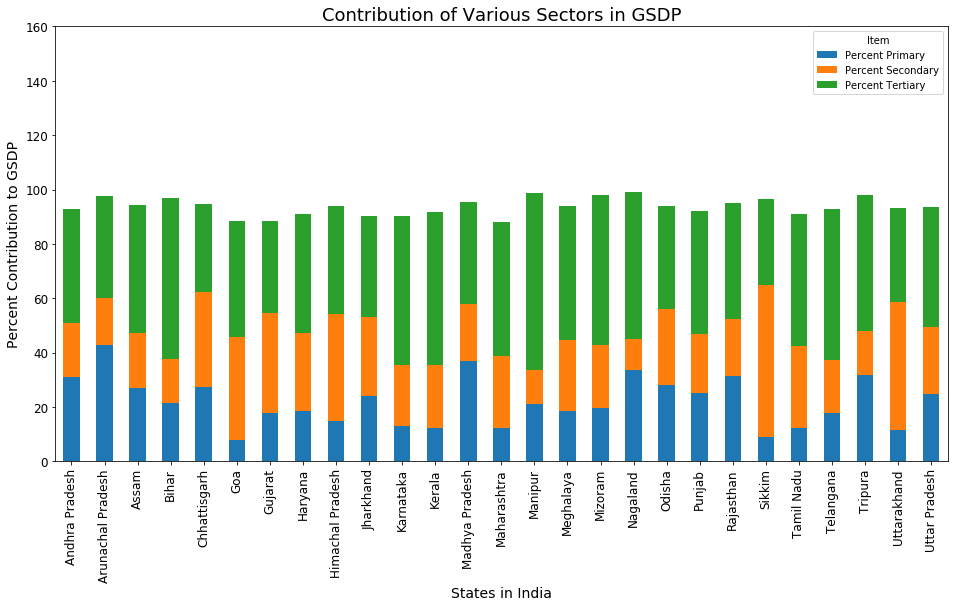

In [472]:
# Plot showing ratio of primary, secondary and tertiary sources for GSDP in percentage
ax=df1.plot.bar(stacked=True,figsize=(16,8))
ax.tick_params("x",labelsize=12)
ax.tick_params("y",labelsize=12)
ax.set_xlabel('States in India',fontsize=14)
ax.set_ylabel('Percent Contribution to GSDP',fontsize=14)
ax.set_yticks([i for i in range(0,180,20)])
ax.set_title("Contribution of Various Sectors in GSDP",fontsize=18)
pt.savefig('D:/test.png',bbox_inches='tight')

In [742]:


df['Percentile Rank Per Capita GSDP']=((1-df['Per Capita GSDP (Rs.)'].values.searchsorted(df['Per Capita GSDP (Rs.)'])/len(df['Per Capita GSDP (Rs.)']*100))*28//1)+1
df1=df1.merge(df[['State','Percentile Rank Per Capita GSDP']],how='outer',on='State')


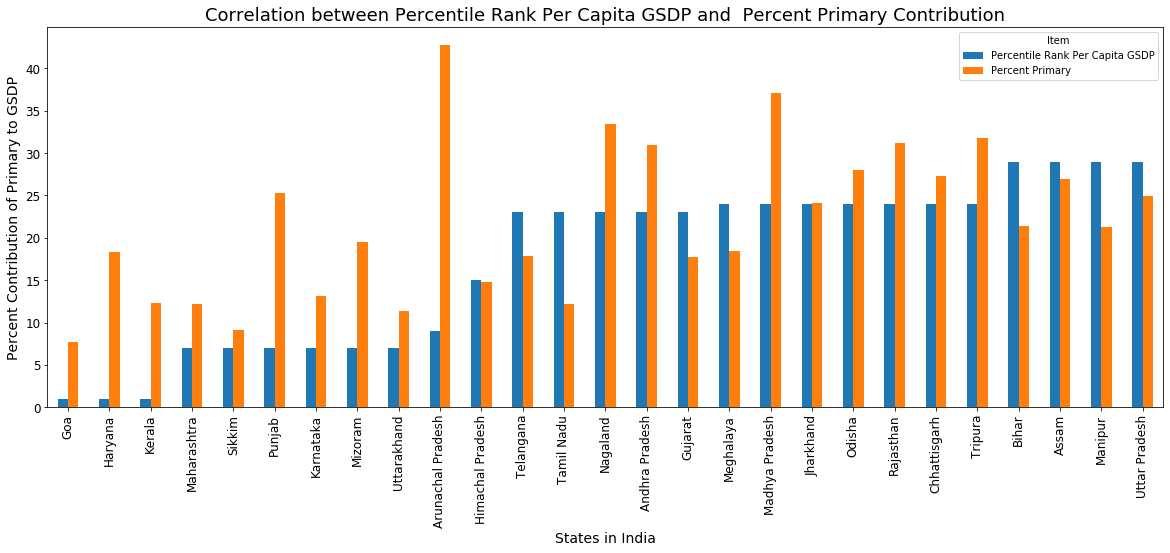

In [628]:
#correlation=df1['Percentile Rank Per Capita GSDP'].corr(df1['Percent Primary'])
df2=df1[['State','Percentile Rank Per Capita GSDP','Percent Primary']]
df2=df2.set_index('State')
df2=df2.sort_values(by='Percentile Rank Per Capita GSDP')
ax=df2.plot.bar(figsize=(20,7))
ax.tick_params("x",labelsize=12)
ax.tick_params("y",labelsize=12)
ax.set_xlabel('States in India',fontsize=14)
ax.set_ylabel('Percent Contribution of Primary to GSDP',fontsize=14)
ax.set_title("Correlation between Percentile Rank Per Capita GSDP and  Percent Primary Contribution",fontsize=18)
pt.savefig('D:/test.png',bbox_inches='tight')


##### Categorize states into C1, C2, C3, C4
C4- 0 <= GSDP <= 0.2

C3- 0.2 < GSDP <= 0.5

C2- 0.5 < GSDP <= 0.85

C1- 0.85 < GSDP <=1

In [629]:
quant=list(df['Per Capita GSDP (Rs.)'].quantile([0.2,0.5,0.85,1]))

values=[]
for i in range(0,len(df2)):
    PerCapita=df['Per Capita GSDP (Rs.)'].iloc[i]
    if(PerCapita>quant[2]):
        values.append('C1')
    elif(PerCapita>quant[1] and PerCapita<quant[2]):
        values.append('C2')
    elif(PerCapita>quant[0] and PerCapita<quant[1]):
        values.append('C3')
    else:
        values.append('C4')
df['Category']=values
#Check count of various categories of State
print('Count of states, categorywise: {}'.format(dict(df.groupby('Category')['State'].count())))

Count of states, categorywise: {'C1': 4, 'C2': 9, 'C3': 7, 'C4': 7}


##### Find sum of Items category wise

In [630]:
#Sum each Item column and group by Category
Category_Sum=df.groupby(['Category']).sum()
Category_Sum

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Total Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Total Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Total Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Percentile Rank Per Capita GSDP
Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C1,14391809.0,7962514.0,4619756.0,872335.0,937204.0,588961.0,14980771.0,13758793.0,2000998.0,11264451.0,27024240.0,13995159.0,12989747.0,1005412.0,6818560.0,587419.0,4295245.0,44776.0,171388.0,281108.0,18106.0,1420517.0,3936489.0,14740245.0,3571292.0,8059922.0,51121666.0,93126678.0,10774501.00,1970502.0,101930677.0,627743.0,830922.0,10.0
C2,75209022.0,47550095.0,19363891.0,5603213.0,2691822.0,10373346.0,85582369.0,109196530.0,13823378.0,40653562.0,163673472.0,61238862.0,55252334.0,5986526.0,33749808.0,2494518.0,15156148.0,318192.0,659841.0,5343732.0,368515.0,9408861.0,36296642.0,92121446.0,18567815.0,36253657.0,278228231.0,527484069.0,71902042.04,13005659.0,586380452.0,4036763.0,1264525.0,121.0
C3,27407472.0,15782803.0,6826716.0,3699735.0,1098217.0,9351471.0,36758945.0,17366065.0,3453045.0,11043032.0,31862141.0,13011909.0,12237349.0,774561.0,7154500.0,965981.0,3655993.0,51280.0,44070.0,259031.0,56693.0,2121450.0,3865363.0,11818709.0,5726276.0,8600028.0,50176787.0,118797873.0,11610853.00,5089182.0,125319545.0,1530113.0,586556.0,150.0
C4,71554460.0,47224569.0,16210483.0,4019783.0,4099624.0,7580719.0,79135179.0,29659298.0,5461993.0,27440837.0,62562128.0,31717995.0,29297239.0,2420756.0,21268784.0,3729334.0,10619560.0,101611.0,131054.0,1055433.0,240640.0,5391151.0,9585361.0,28582943.0,15687527.0,20074404.0,126917014.0,268614322.0,27434988.00,10150402.0,285898908.0,5185183.0,432524.0,187.0


##### Display contribution of sectors to GSDP in terms of percentage for various categories of state

In [631]:
#Get subsector names
Sector=[]
for i in range(1,12):
    Sector.append(sector_dict[str(i)])
#Get sum details of subsectors category wise
Category_sum1=Category_Sum[Sector]
Sector.append('Gross State Domestic Product')


#Category_Sum=Category_Sum[Sector]
categories=['C1','C2','C3','C4']
percentage=[]
sector=[]
dic=[]
for c in categories:
    sect_val=list(Category_sum1.loc[c].sort_values(ascending=False).keys())
    sort_val=list(Category_sum1.loc[c].sort_values(ascending=False))
    
    perc_val=list(map(lambda x:x/Category_Sum.loc[c]['Gross State Domestic Product']*100,sort_val))
    tot_per=0
    for i in range(0,10):
        tot_per=perc_val[i]+tot_per
        if(round(tot_per,0)>=79):
            break
    print("Top sectors contributing to 80%(Actual {}%) of GSDP for {}:\n{}\n".format(round(tot_per,0),c,sect_val[0:i]))
    percentage.append(perc_val[0:i])
    sector.append(sect_val[0:i])
    
            

Top sectors contributing to 80%(Actual 81.0%) of GSDP for C1:
['Real estate, ownership of dwelling & professional services', 'Agriculture, forestry and fishing', 'Trade, repair, hotels and restaurants', 'Manufacturing', 'Construction', 'Other services']

Top sectors contributing to 80%(Actual 83.0%) of GSDP for C2:
['Manufacturing', 'Real estate, ownership of dwelling & professional services', 'Agriculture, forestry and fishing', 'Trade, repair, hotels and restaurants', 'Construction', 'Financial services', 'Other services']

Top sectors contributing to 80%(Actual 79.0%) of GSDP for C3:
['Agriculture, forestry and fishing', 'Manufacturing', 'Trade, repair, hotels and restaurants', 'Real estate, ownership of dwelling & professional services', 'Construction', 'Mining and quarrying']

Top sectors contributing to 80%(Actual 81.0%) of GSDP for C4:
['Agriculture, forestry and fishing', 'Trade, repair, hotels and restaurants', 'Manufacturing', 'Real estate, ownership of dwelling & professiona

###### Plot of subsector v/s percentage contribution states categorywise

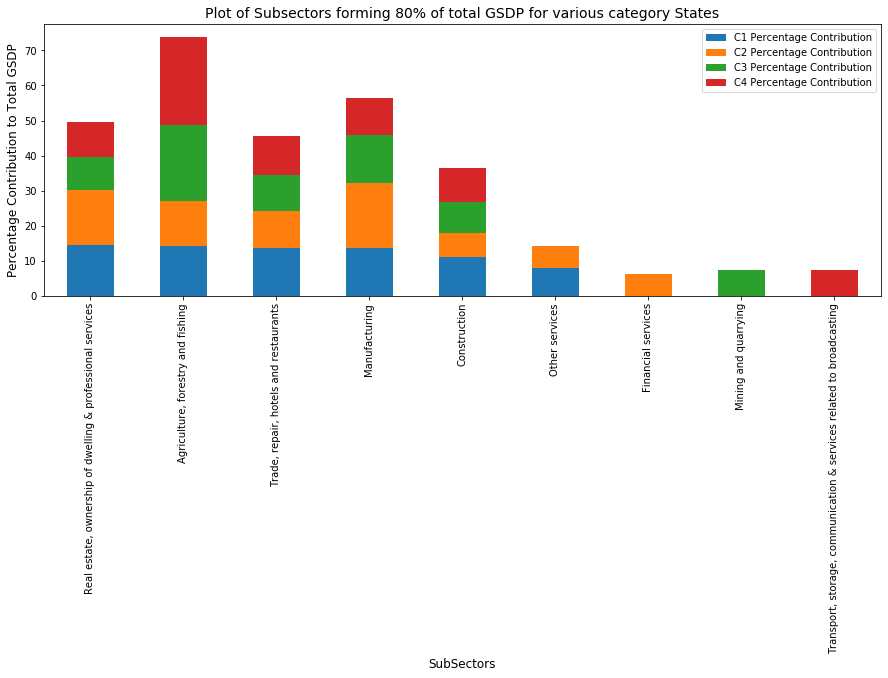

In [633]:

cat=[[categories[i]]*len(sector[i]) for i in range(0,4)]
df4=pd.DataFrame(columns=['Category','SubSector','Percentage'])
df4['SubSector']=pd.Series(sector[0]+sector[1]+sector[2]+sector[3])
df4['Percentage']=pd.Series(percentage[0]+percentage[1]+percentage[2]+percentage[3])
df4['Category']=pd.Series(cat[0]+cat[1]+cat[2]+cat[3])
df6=pd.DataFrame(columns=['SubSector'])
df6['SubSector']=df4['SubSector'].unique()
x=df4['SubSector'].unique()
for i in categories:
    df5=df4.query('Category=="'+i+'"')[['SubSector','Percentage']]
    
    df5=df5.rename(columns={"Percentage":i+" Percentage Contribution"})
    df6=df6.merge(df5,how='outer',on='SubSector')
df6=df6.set_index('SubSector')
ax=df6.plot.bar(stacked=True,figsize=(15,5))
ax.set_title('Plot of Subsectors forming 80% of total GSDP for various category States',fontsize=14)
ax.set_ylabel('Percentage Contribution to Total GSDP',fontsize=12)
ax.set_xlabel('SubSectors',fontsize=12)
#pt.savefig('D:/test.png',bbox_inches='tight')

##### GSDP comparison state category wise

Text(0.5, 0, 'Category Of States')

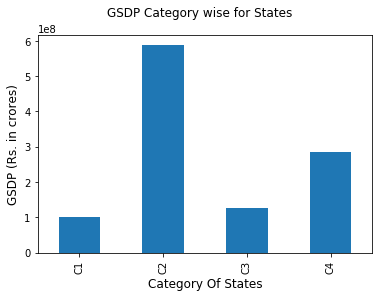

In [751]:
#plot of GSDP across states
Category_Sum['Gross State Domestic Product'].plot.bar()
pt.suptitle("GSDP Category wise for States")
pt.ylabel('GSDP (Rs. in crores)',fontsize=12)
pt.xlabel('Category Of States',fontsize=12)

###### Correlation between subsectors and GSDP

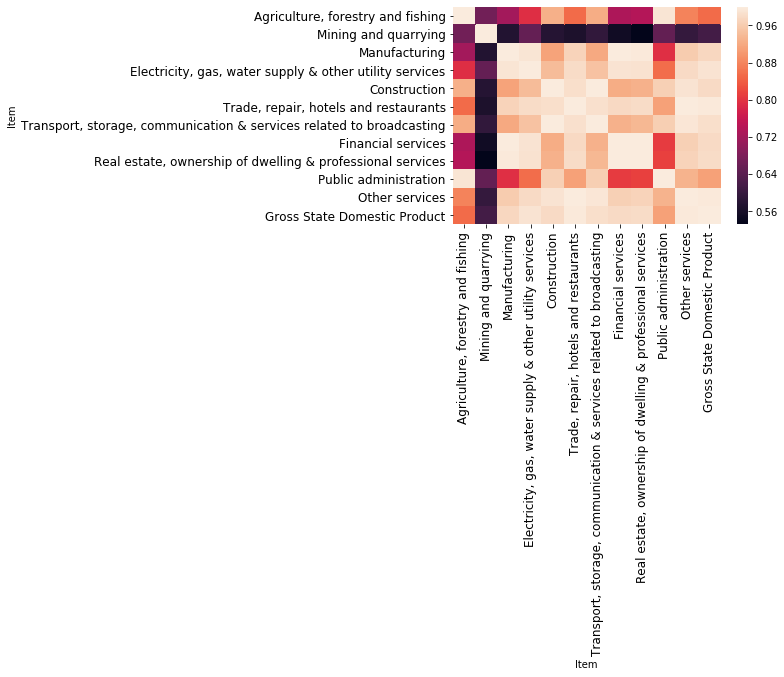

In [635]:
Category_sum1['Gross State Domestic Product']=Category_Sum['Gross State Domestic Product']
pt.xticks(rotation=40,fontsize=12)
pt.yticks(rotation=40,fontsize=12)
sns.heatmap(Category_sum1.corr())
#pt.savefig('D:/test.png',bbox_inches='tight')

##### Read input file

In [744]:
path= r'C:\Users\ltadmin\Downloads\GDP_Assignment\Input_Files'
df3=pd.read_csv(path+'/rs_session243_au570_1.1.csv')


###### Prepare data

In [745]:
#Rename columns
df3=df3[['Level of Education - State','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015']]
df3=df3.rename(columns={'Level of Education - State':'State','Primary - 2014-2015.1':'Primary Dropout Rate','Upper Primary - 2014-2015':'Upper Primary Dropout Rate','Secondary - 2014-2015':'Secondary Dropout Rate'})

#Merge required data into df3
df3=df3.merge(df1,how='inner',on='State')
df3=df3.merge(df[['State','Per Capita GSDP (Rs.)']],how='inner',on='State')

In [746]:
df3

,State,Primary Dropout Rate,Upper Primary Dropout Rate,Secondary Dropout Rate,Percent Primary,Percent Secondary,Percent Tertiary,Percentile Rank Per Capita GSDP,Per Capita GSDP (Rs.)
0,Andhra Pradesh,6.72,5.20,15.71,30.97,19.92,41.85,23.0,104977.0
1,Arunachal Pradesh,10.82,6.71,17.11,42.77,17.15,37.70,9.0,112718.0
2,Assam,15.36,10.51,27.06,26.89,20.36,46.98,29.0,60621.0
3,Bihar,NaN,4.08,25.90,21.45,16.01,59.32,29.0,33954.0
4,Goa,0.73,0.07,11.15,7.68,38.09,42.78,1.0,271793.0
5,Gujarat,0.89,6.41,25.04,17.75,36.90,33.76,23.0,141263.0
6,Haryana,5.61,5.81,15.89,18.38,28.71,43.95,1.0,164077.0
7,Himachal Pradesh,0.64,0.87,6.07,14.84,39.47,39.60,15.0,147330.0
8,Jharkhand,5.48,8.99,24.00,24.17,28.75,37.46,24.0,62091.0
9,Karnataka,2.02,3.85,26.18,13.09,22.22,54.77,7.0,145141.0


##### Find correlation between Dropout rates and Per Capita GSDP

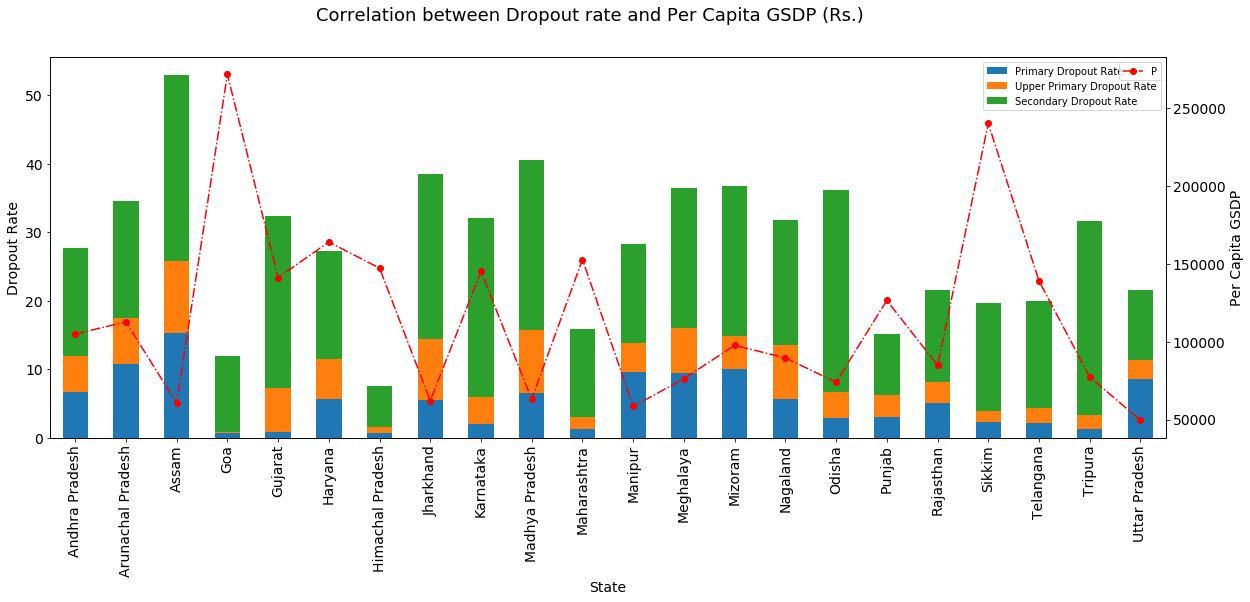

In [749]:
df4=df3[['State','Primary Dropout Rate','Upper Primary Dropout Rate','Secondary Dropout Rate','Per Capita GSDP (Rs.)']]
df4.set_index('State',inplace=True)


#Remove invalid rows
df4=df4.dropna()
#Plot stacked bar graph for drop out rates and line graph for per capita GSDP
ax1=df4[['Primary Dropout Rate','Upper Primary Dropout Rate','Secondary Dropout Rate']].plot.bar(stacked=True,figsize=(20,7))
ax2=ax1.twinx()
line=ax2.plot(df4['Per Capita GSDP (Rs.)'],color='red',marker='o',linestyle='-.')
ax1.tick_params(axis='both',labelsize=14)
ax2.tick_params(axis='y',labelsize=14)
ax2.legend(line,'Per Capita GSDP')
pt.suptitle('Correlation between Dropout rate and Per Capita GSDP (Rs.)',fontsize=18)
ax2.set_ylabel('Per Capita GSDP',fontsize=14)
ax1.set_ylabel('Dropout Rate',fontsize=14)
ax1.set_xlabel('State',fontsize=14)

#pt.savefig('D:/test.png',bbox_inches='tight')

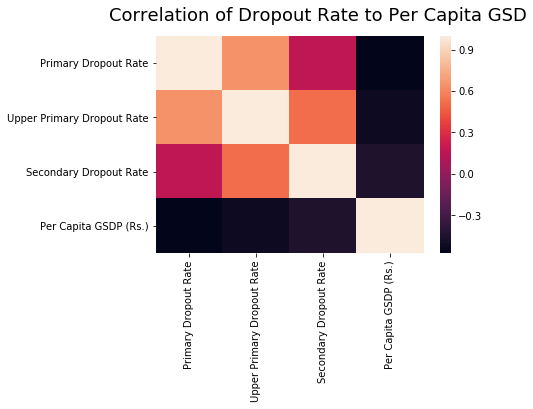

In [733]:
#Heatmap
df4=df3[['State','Primary Dropout Rate','Upper Primary Dropout Rate','Secondary Dropout Rate','Per Capita GSDP (Rs.)']]

sns.heatmap(df4.corr())

pt.suptitle('Correlation of Dropout Rate to Per Capita GSD',fontsize=18)
#pt.savefig('D:/test.png',bbox_inches='tight')

##### Find correlation between dropout rate and population

Text(0.5, 0.98, 'Comparison of Population against Dropout Rates')

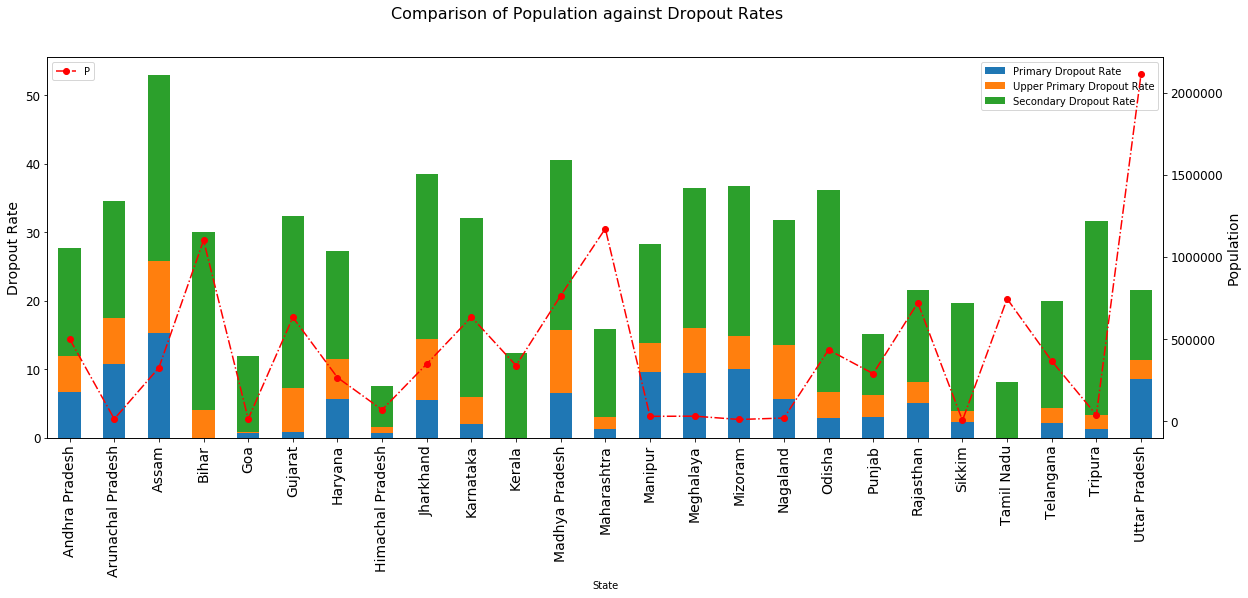

In [750]:
#Plot dropout rates a sstacked bar graph and population as line grpah with dual axes
df4=df3[['State','Primary Dropout Rate','Upper Primary Dropout Rate','Secondary Dropout Rate']].merge(df[['State',"Population ('00)"]],on='State',how='inner')
df4=df4.set_index('State')
ax1=df4[['Primary Dropout Rate','Upper Primary Dropout Rate','Secondary Dropout Rate']].plot.bar(stacked=True,figsize=(20,7))
ax2=ax1.twinx()
line=ax2.plot(df4["Population ('00)"],color='red',marker='o',linestyle='-.')
ax1.tick_params(axis='y',labelsize=12)
ax1.tick_params(axis='x',labelsize=14)
ax2.tick_params(axis='y',labelsize=12)
ax2.set_ylabel('Population',fontsize=14)
ax1.set_ylabel('Dropout Rate',fontsize=14)
ax2.legend(line,'Population')
pt.suptitle("Comparison of Population against Dropout Rates",fontsize=16)

#pt.savefig('D:/test.png',bbox_inches='tight')

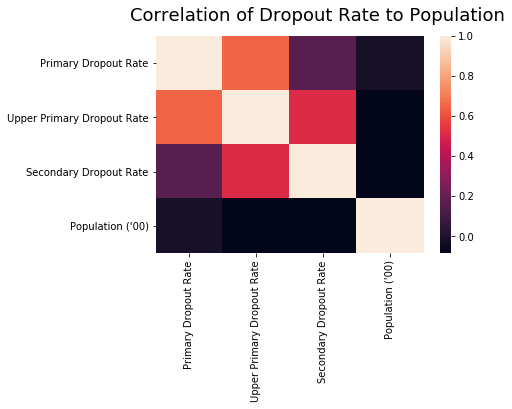

In [735]:
#Heat map
sns.heatmap(df4.corr())
pt.suptitle('Correlation of Dropout Rate to Population',fontsize=18)
pt.savefig('D:/test.png',bbox_inches='tight')